In [1]:
import torch
from data import Data, data_smoothing
from plot import plot_output
from torch.utils.data import DataLoader

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = torch.load('./baryon_model_19gev.pt')
model.eval()

BaryonModel(
  (linear): Linear(in_features=141, out_features=141, bias=True)
)

In [3]:
dataset = Data('NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf')

data_loader = DataLoader(
    dataset=dataset,
    shuffle=True
)

Values for actual final state
Mean: 17.56314144060472
Standard Deviation: 9.967369316221259
Variance: 99.34845108594905 
Variance Error: 2.407680027784436
Skew: 0.6241523777310257
Skew Error: 1.8407496802793586
Kurtosis: 2.3590601987410142
Kurtosis Error: 11.427535474791647

Values for model output final state
Mean: 17.360691774821223
Standard Deviation: 9.774583139713156
Variance: 95.54247555516471 
Variance Error: 2.3047891132828595
Skew: 0.6135542184815879
Skew Error: 1.7760479183979485
Kurtosis: 2.346581868893395
Kurtosis Error: 10.83554970468785


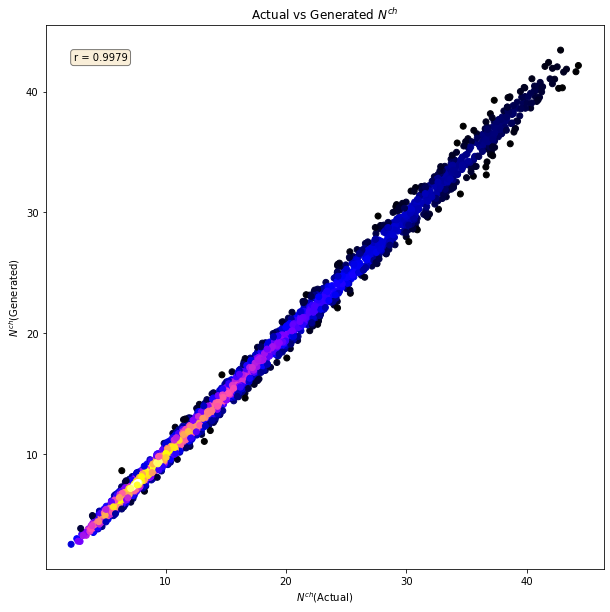

In [4]:
finals = []
models = []
bound_1 = -1
bound_2 = 1

import utils
import plot
import numpy as np

for i, data in enumerate(data_loader):
    #if i > 5: break

    baryons = data[0]
    protons = data[1].flatten()
    output = model(baryons.float())

    baryon_eta_trim, baryon_trim = utils.trim( dataset.final_eta, protons, bound_1, bound_2  )
    _, output_trim = utils.trim( dataset.final_eta, output.detach().numpy().flatten(), bound_1, bound_2  )

    finals.append( np.trapz( baryon_trim, x=baryon_eta_trim ) )
    models.append( np.trapz( output_trim, x=baryon_eta_trim ) )

    #plot_output(dataset.final_eta, protons, output.detach().numpy().flatten())

finals_moments = utils.Moments(finals)
models_moments = utils.Moments(models)

print("Values for actual final state")
print(finals_moments)

print()

print("Values for model output final state")
print(models_moments)

plot.plot_cc_graph(np.array(finals), np.array(models))